# Loan Default Prediction
A data is taken from kaggle.com "Credit Risk: Predicting loan default" data set.

Notebook includes:
1. Analyzing given parameters of customer data
2. Building a Regression Model using the parameters with the most statistical significance
3. Identifying accuracy rate of the model

In [1]:
import pandas as pd
import os

In [2]:
path = r'C:\Users\kirat\Documents\Career Foundry\Personal Project'

In [4]:
#creating dataframe from the downloaded data set

df = pd.read_excel(os.path.join(path, '02 Data','Original Data','dataDT.xls'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [6]:
#1500 customers are selected to run the analysis with given parameters

df.head()

,branch,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,3,3017,10012,28,2,7,2,44,17.7,2.99,4.80,0
1,3,3017,10017,64,5,34,17,116,14.7,5.05,12.00,0
2,3,3017,10030,40,1,20,12,61,4.8,1.04,1.89,0
3,3,3017,10039,30,1,11,3,27,34.5,1.75,7.56,0
4,3,3017,10069,25,1,2,2,30,22.4,0.76,5.96,1


In [7]:
# column 'default' is the response variable used in this analysis
# 0-the loan was paid in full
# 1-the loan was defaulted

df['default'].unique()

array([0, 1], dtype=int64)

In [8]:
df['branch'].unique()

array([ 3, 13, 15, 20, 25, 49, 60, 64, 68, 73, 74, 75, 76, 77, 91],
      dtype=int64)

In [9]:
df.groupby(['branch']).count()

,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
branch,,,,,,,,,,,
3,100,100,100,100,100,100,100,100,100,100,100
13,100,100,100,100,100,100,100,100,100,100,100
15,100,100,100,100,100,100,100,100,100,100,100
20,100,100,100,100,100,100,100,100,100,100,100
25,100,100,100,100,100,100,100,100,100,100,100
49,100,100,100,100,100,100,100,100,100,100,100
60,100,100,100,100,100,100,100,100,100,100,100
64,100,100,100,100,100,100,100,100,100,100,100
68,100,100,100,100,100,100,100,100,100,100,100


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([418., 315., 225., 192., 128.,  84.,  51.,  53.,  23.,  11.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <a list of 10 Patch objects>)

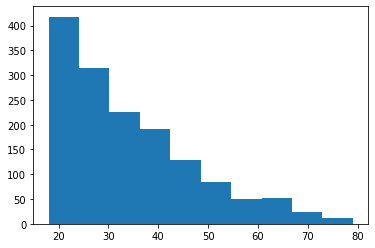

In [11]:
#histogram shows that most of the customers in this study are younger

plt.hist(df['age'])

<Figure size 792x504 with 0 Axes>

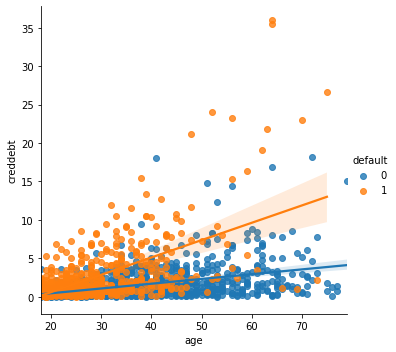

In [12]:
# lineplot shows age vs credit card debt

plt.figure(figsize=(11,7))
sns.lmplot(y='creddebt',x='age',data=df,hue='default')

<Figure size 792x504 with 0 Axes>

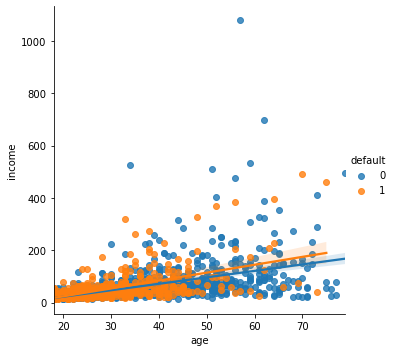

In [13]:
# lineplot show age vs income

plt.figure(figsize=(11,7))
sns.lmplot(y='income',x='age',data=df,hue='default')

<Figure size 792x504 with 0 Axes>

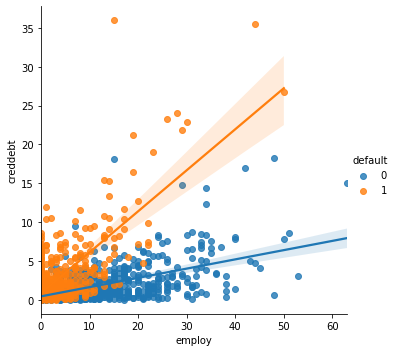

In [14]:
#lineplot show number of years employed vs credit card debt
plt.figure(figsize=(11,7))
sns.lmplot(y='creddebt',x='employ',data=df,hue='default')

In [15]:
# choosing predictors for the logistic model

X=df[['age','employ','debtinc','creddebt']]
y=df['default']

#### Logistic Regression Model with accuracy rate and confusion matrix

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [17]:
predictions=logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       229
           1       0.71      0.51      0.59       146

    accuracy                           0.73       375
   macro avg       0.72      0.69      0.69       375
weighted avg       0.73      0.73      0.72       375



In [18]:
print(logmodel.intercept_)

[-0.50060879]


In [19]:
print(logmodel.coef_)

[[-0.03080248 -0.22398349  0.1047717   0.51507876]]


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[199,  30],
       [ 72,  74]], dtype=int64)

Backward substitution was used to filter out the columns with no statistical signigicance with Gretl aiding in finding p-values for the coefficients. With limited resources of the data set the following columns were found to have statistical significance in the use of logistic model: 'age','employ','debtinc','creddebt'. 
With accuracy listed in the classification report, the model can predict the load default rating. 